# One Rule (OneR) Algorithm

## Define Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

from mlxtend.classifier import OneRClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Import

In [2]:
veri = pd.read_csv('Churn_Data.csv')
veri

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Preprocessing

In [3]:
veri = veri.set_index('customer_id')
display(veri)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [4]:
veri.drop(['country', 'estimated_salary', 'balance'], axis=1, inplace=True)

In [5]:
veri.info()
veri.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   credit_score     10000 non-null  int64 
 1   gender           10000 non-null  object
 2   age              10000 non-null  int64 
 3   tenure           10000 non-null  int64 
 4   products_number  10000 non-null  int64 
 5   credit_card      10000 non-null  int64 
 6   active_member    10000 non-null  int64 
 7   churn            10000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 703.1+ KB


credit_score       0
gender             0
age                0
tenure             0
products_number    0
credit_card        0
active_member      0
churn              0
dtype: int64

In [6]:
lencoders = {}
for col in veri.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    veri[col] = lencoders[col].fit_transform(veri[col])

In [7]:
veri['churn'] = veri['churn'].map({0: 'NonChurn', 1: 'Churn'})

NonChurn    7963
Churn       2037
Name: churn, dtype: int64

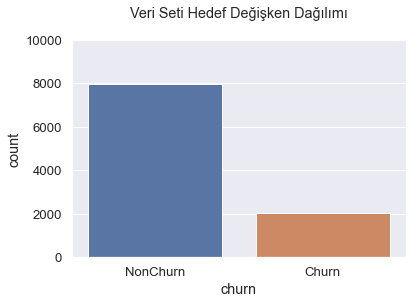

In [8]:
sns.set(font_scale=1.2) 
sns.countplot(data=veri, x='churn',
              order = veri['churn'].value_counts().index).set(title='Veri Seti Hedef Değişken Dağılımı\n',
                                                              ylim=(0, 10000))
veri.churn.value_counts()

In [9]:
veri.describe()

,credit_score,gender,age,tenure,products_number,credit_card,active_member
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,1.530200,0.70550,0.515100
std,96.653299,0.497932,10.487806,2.892174,0.581654,0.45584,0.499797
min,350.000000,0.000000,18.000000,0.000000,1.000000,0.00000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,1.000000,0.00000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,1.000000,1.00000,1.000000
75%,718.000000,1.000000,44.000000,7.000000,2.000000,1.00000,1.000000
max,850.000000,1.000000,92.000000,10.000000,4.000000,1.00000,1.000000


In [10]:
display(veri)

,credit_score,gender,age,tenure,products_number,credit_card,active_member,churn
customer_id,,,,,,,,
15634602,619,0,42,2,1,1,1,Churn
15647311,608,0,41,1,1,0,1,NonChurn
15619304,502,0,42,8,3,1,0,Churn
15701354,699,0,39,1,2,0,0,NonChurn
15737888,850,0,43,2,1,1,1,NonChurn
...,...,...,...,...,...,...,...,...
15606229,771,1,39,5,2,1,0,NonChurn
15569892,516,1,35,10,1,1,1,NonChurn
15584532,709,0,36,7,1,0,1,Churn


## Correlation

,credit_score,gender,age,tenure,products_number,credit_card,active_member
credit_score,1.000000,-0.002857,-0.003965,0.000842,0.012238,-0.005458,0.025651
gender,-0.002857,1.000000,-0.027544,0.014733,-0.021859,0.005766,0.022544
age,-0.003965,-0.027544,1.000000,-0.009997,-0.030680,-0.011721,0.085472
tenure,0.000842,0.014733,-0.009997,1.000000,0.013444,0.022583,-0.028362
products_number,0.012238,-0.021859,-0.030680,0.013444,1.000000,0.003183,0.009612
credit_card,-0.005458,0.005766,-0.011721,0.022583,0.003183,1.000000,-0.011866
active_member,0.025651,0.022544,0.085472,-0.028362,0.009612,-0.011866,1.000000


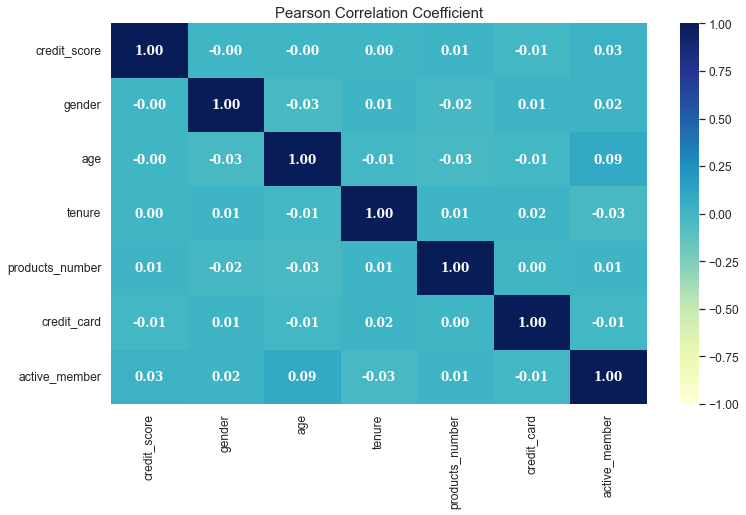

In [11]:
features = veri.drop(['churn'], axis=1)

display(features.corr())
  
sns.set(font_scale=1.1) 
plt.subplots(figsize=(12, 7))

dataplot = sns.heatmap(features.corr().round(2), vmin=-1, vmax=1, cmap="YlGnBu", annot=True,
                      fmt=".2f",
            annot_kws={'fontsize': 12, 
                       'fontweight': 'bold',
                       'fontfamily': 'serif'})

plt.title('Pearson Correlation Coefficient', fontsize=15)
plt.show()

## Data Partition

In [12]:
X = veri.iloc[:, 0:7].to_numpy()   #öznitelikler
y = veri.iloc[:, -1].to_numpy()    #hedef değişken

In [13]:
X_eğitim, X_test, y_eğitim, y_test = train_test_split(X, y,  test_size = 0.20, random_state=0, stratify=y)

NonChurn    6370
Churn       1630
Name: churn, dtype: int64

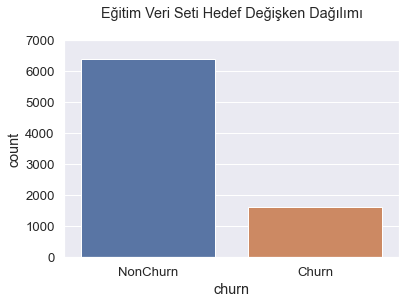

In [14]:
eğitim_df = pd.concat([pd.DataFrame(X_eğitim),
                      pd.DataFrame(y_eğitim)], axis=1)

eğitim_df.columns = ['credit_score', 'gender', 'age', 'tenure', 'products_number',
                    'credit_card', 'active_member', 'churn']

sns.set(font_scale=1.2) 
sns.countplot(data=eğitim_df, x='churn').set(title='Eğitim Veri Seti Hedef Değişken Dağılımı\n', ylim=(0, 7000))
eğitim_df.churn.value_counts()

NonChurn    1593
Churn        407
Name: churn, dtype: int64

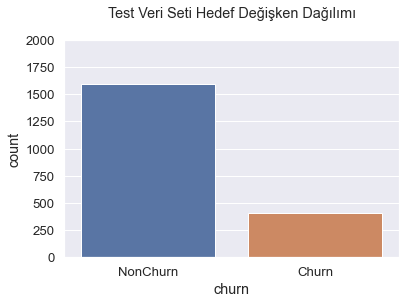

In [15]:
test_df = pd.concat([pd.DataFrame(X_test),
                     pd.DataFrame(y_test)], axis=1)

test_df.columns = ['credit_score', 'gender', 'age', 'tenure', 'products_number',
                    'credit_card', 'active_member', 'churn']

sns.set(font_scale=1.2) 
sns.countplot(data=test_df, x='churn').set(title='Test Veri Seti Hedef Değişken Dağılımı\n', ylim=(0, 2000))
test_df.churn.value_counts()

In [16]:
y_eğitim = np.vectorize({'NonChurn' : 0, 'Churn': 1}.get)(y_eğitim).astype('int64')
y_test = np.vectorize({'NonChurn' : 0, 'Churn': 1}.get)(y_test).astype('int64')

## OneR Model

In [17]:
oner = OneRClassifier()

oner.fit(X_eğitim, y_eğitim)

OneRClassifier()

In [18]:
oner.feature_idx_

4

In [19]:
pd.DataFrame(X_eğitim)

,0,1,2,3,4,5,6
0,554,0,39,10,2,1,1
1,569,1,35,10,1,1,1
2,597,0,42,4,1,1,1
3,684,1,33,4,1,1,0
4,733,1,48,7,1,1,1
...,...,...,...,...,...,...,...
7995,744,1,29,1,1,0,0
7996,606,1,35,7,1,1,0
7997,618,1,33,4,2,1,1
7998,714,1,54,7,1,1,0


In [20]:
oner.prediction_dict_

{'total error': 1444, 'rules (value: class)': {1: 0, 2: 0, 3: 1, 4: 1}}

In [21]:
print("Eğitim verisi tahminleri: ", oner.predict(X_eğitim))

Eğitim verisi tahminleri:  [0 0 0 ... 0 0 0]


In [22]:
Eğitim_KM = metrics.confusion_matrix(y_eğitim, oner.predict(X_eğitim))

Eğitim_KM_Label = pd.DataFrame(Eğitim_KM)
Eğitim_KM_Label.columns = ['Tahminde NonChurn',
                           'Tahminde Churn']
Eğitim_KM_Label = Eğitim_KM_Label.rename(index ={0: 'Gerçekte NonChurn',
                                                 1: 'Gerçekte Churn'})

print('\033[1m' + "Eğitim Verisine Ait Karışıklık Matrisi" + '\033[0m')
Eğitim_KM_Label

Eğitim Verisine Ait Karışıklık Matrisi


,Tahminde NonChurn,Tahminde Churn
Gerçekte NonChurn,6337,33
Gerçekte Churn,1411,219


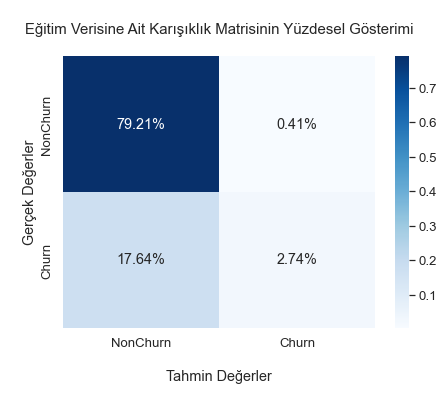

In [23]:
plt.subplots(figsize=(7, 5))

Eğitim_KM_Prc = sns.heatmap(Eğitim_KM/np.sum(Eğitim_KM),
                            annot=True,
                            fmt='.2%',
                            cmap='Blues')

Eğitim_KM_Prc.set_xlabel('\nTahmin Değerler\n')
Eğitim_KM_Prc.set_ylabel('\nGerçek Değerler')

Eğitim_KM_Prc.xaxis.set_ticklabels(['NonChurn','Churn'])
Eğitim_KM_Prc.yaxis.set_ticklabels(['NonChurn','Churn'])

plt.title('\nEğitim Verisine Ait Karışıklık Matrisinin Yüzdesel Gösterimi\n',
          fontsize=15)
plt.show()

In [24]:
train_acc = oner.score(X_eğitim, y_eğitim)
print(f'Eğitim için doğruluk oranı: {train_acc*100:.2f}%')

Eğitim için doğruluk oranı: 81.95%


## TEST

In [25]:
print("Test verisi tahminleri: ",oner.predict(X_test))

Test verisi tahminleri:  [0 0 0 ... 0 0 0]


In [26]:
Test_KM = metrics.confusion_matrix(y_test, oner.predict(X_test))

Test_KM_Label = pd.DataFrame(Test_KM)
Test_KM_Label.columns = ['Tahminde NonChurn',
                         'Tahminde Churn']
Test_KM_Label = Test_KM_Label.rename(index ={0: 'Gerçekte NonChurn',
                                             1: 'Gerçekte Churn'})

print('\033[1m' + "Test Verisine Ait Karışıklık Matrisi" + '\033[0m')
Test_KM_Label

Test Verisine Ait Karışıklık Matrisi


,Tahminde NonChurn,Tahminde Churn
Gerçekte NonChurn,1580,13
Gerçekte Churn,346,61


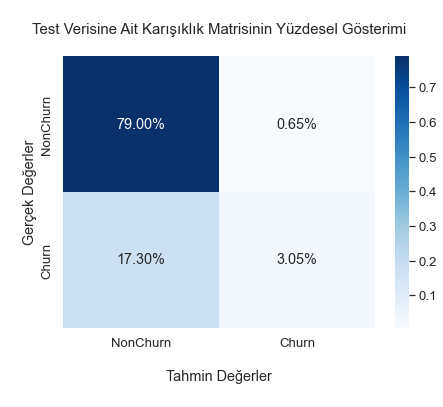

In [27]:
plt.subplots(figsize=(7, 5))
Test_KM_Prc = sns.heatmap(Test_KM/np.sum(Test_KM),
                          annot=True,
                          fmt='.2%',
                          cmap='Blues')

Test_KM_Prc.set_xlabel('\nTahmin Değerler\n')
Test_KM_Prc.set_ylabel('\nGerçek Değerler')

Test_KM_Prc.xaxis.set_ticklabels(['NonChurn','Churn'])
Test_KM_Prc.yaxis.set_ticklabels(['NonChurn','Churn'])

plt.title('\nTest Verisine Ait Karışıklık Matrisinin Yüzdesel Gösterimi\n', fontsize=15)
plt.show()

In [28]:
test_acc = oner.score(X_test, y_test)
print(f'Test için doğruluk oranı: {test_acc*100:.2f}%')

Test için doğruluk oranı: 82.05%


In [29]:
Sınıflar = ['NonChurn', 'Churn']
print(classification_report(y_test,
                            oner.predict(X_test),
                            target_names=Sınıflar))

              precision    recall  f1-score   support

    NonChurn       0.82      0.99      0.90      1593
       Churn       0.82      0.15      0.25       407

    accuracy                           0.82      2000
   macro avg       0.82      0.57      0.58      2000
weighted avg       0.82      0.82      0.77      2000

